We will use the daily spreadsheet from EU CDC containing new cases and deaths by country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-12-11 14:04:03--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.225.25.15, 13.225.25.36, 13.225.25.73, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.225.25.15|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get inline plots.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel(
    'COVID-19-geographic-disbtribution-worldwide.xlsx',
    keep_default_na=False,
    na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
1 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
2 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
3 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
4 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
5 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
6 2020-12-05    5     12  2020    235      18             Afghanistan    AF   
7 2020-12-04    4     12  2020    119       5             Afghanistan    AF   
8 2020-12-03    3     12  2020    202      19             Afghanistan    AF   
9 2020-12-02    2     12  2020    400      48             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           7.134266           
1                                           6.968658           
2                                           6.963401           
3                                           7.094835           
4                                           7.215755           
5                                           7.326160           
6                                           7.115865           
7                                           7.107979           
8                                           7.536455           
9                                           7.005460

Last checks of our source dataframe.

In [4]:
df.count()

dateRep                                                       61261
day                                                           61261
month                                                         61261
year                                                          61261
cases                                                         61261
deaths                                                        61261
countriesAndTerritories                                       61261
geoId                                                         61261
countryterritoryCode                                          61141
popData2019                                                   61141
continentExp                                                  61261
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    58385
dtype: int64

In [5]:
df.describe().transpose()

count          mean  \
day                                                 61261.0  1.565640e+01   
month                                               61261.0  7.015703e+00   
year                                                61261.0  2.019999e+03   
cases                                               61261.0  1.130942e+03   
deaths                                              61261.0  2.583015e+01   
popData2019                                         61141.0  4.103770e+07   
Cumulative_number_for_14_days_of_COVID-19_cases...  58385.0  6.494350e+01   

                                                             std          min  \
day                                                 8.883068e+00     1.000000   
month                                               2.926655e+00     1.000000   
year                                                3.305303e-02  2019.000000   
cases                                               6.612464e+03 -8261.000000   
deaths                                              1.303658e+02 -1918.000000   
popData2019                                         1.532541e+08   815.000000   
Cumulative_number_for_14_days_of_COVID-19_cases...  1.598333e+02  -147.419587   

                                                             25%  \
day                                                 8.000000e+00   
month                                               5.000000e+00   
year                                                2.020000e+03   
cases                                               0.000000e+00   
deaths                                              0.000000e+00   
popData2019                                         1.293120e+06   
Cumulative_number_for_14_days_of_COVID-19_cases...  7.288186e-01   

                                                             50%  \
day                                                 1.600000e+01   
month                                               7.000000e+00   
year                                                2.020000e+03   
cases                                               1.500000e+01   
deaths                                              0.000000e+00   
popData2019                                         7.813207e+06   
Cumulative_number_for_14_days_of_COVID-19_cases...  6.644029e+00   

                                                             75%           max  
day                                                 2.300000e+01  3.100000e+01  
month                                               9.000000e+00  1.200000e+01  
year                                                2.020000e+03  2.020000e+03  
cases                                               2.670000e+02  2.319300e+05  
deaths                                              4.000000e+00  4.928000e+03  
popData2019                                         2.851583e+07  1.433784e+09  
Cumulative_number_for_14_days_of_COVID-19_cases...  5.140620e+01  1.900836e+03

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(
    index='dateRep',
    columns='geoId',
    values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-07  45.0  1153.0  210.0  2.0  2.0  840.0   407.0    0.0  3278.0   
2020-12-08  34.0  1148.0  200.0  0.0  0.0  695.0   584.0  112.0  3216.0   
2020-12-09  43.0  1260.0  135.0  0.0  1.0  753.0  1138.0   81.0  3610.0   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-07  2745.0  ...    0.0  0.0  0.0  0.0  0.0  19.0  0.0  139.0  0.0  0.0  
2020-12-08  2181.0  ...    0.0  0.0  0.0  0.0  0.0  14.0  0.0   43.0  0.0  3.0  
2020-12-09  2531.0  ...    0.0  0.0  0.0  0.0  0.0  17.0  0.0  183.0  0.0  9.0  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  

[347 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range, add a year and check our latest date.

In [7]:
new_index = pd.date_range(
    df_geo.index.min(),
    df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2021-12-07   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-08   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-09   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2021-12-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2021-12-07 NaN NaN NaN NaN NaN NaN NaN  
2021-12-08 NaN NaN NaN NaN NaN NaN NaN  
2021-12-09 NaN NaN NaN NaN NaN NaN NaN  
2021-12-10 NaN NaN NaN NaN NaN NaN NaN  
2021-12-11 NaN NaN NaN NaN NaN NaN NaN  

[712 rows x 428 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    712.000000
mean     355.500000
std      205.680983
min        0.000000
25%      177.750000
50%      355.500000
75%      533.250000
max      711.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach, selecting country and measure and columns to creat for smoothed and predicted measures.

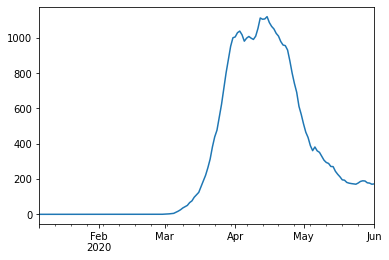

In [33]:
country  = 'NL'
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

df_geo[(smeasure, country)] = df_geo[measure][country].loc[:'20200601'].rolling(7).mean()

df_pred = pd.DataFrame(
    {'daynum':df_geo['daynum'],
     measure:df_geo[smeasure][country]})
df_pred[df_pred[measure].notnull()][measure].plot()

The typical progress of an outbreak is assumed to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(- (x - mu) / beta))`, where `mu` is the location parameter and `beta` the scale parameter.

In [34]:
def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [35]:
popdata  = df[df['geoId'] == country]['popData2019'].iloc[0]
mincases = popdata / 1e6
numcases = df_pred[measure].sum()
print(mincases, numcases)

17.282163 45938.0


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the Gumbel CDF.

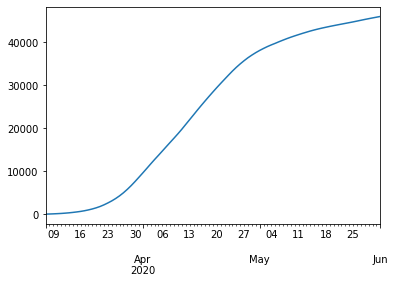

In [36]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that assumed amount of progress, returning the residuals of the fit as a measure to be minimized.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least 5 measures, to prevent spurious fits. (Such as fitting a line on just two measures, which would be perfect but not relevant.)

In [37]:
from scipy.stats import linregress

def fitres(progress):
    """Try to fit a line according to progress, returning correlation of fit"""
    global df_pred, slope, intercept
    
    # Scale the cumulative measure and only keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 5 measures left.
    if len(df_fit) >= 5:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        slope, intercept, rvalue, pvalue, stderr = linregress(df_fit[['daynum', 'linear']])
        print('Progress {:7.3f}% rsquared {:8.6f} for {:3.0f} measures'.format(
            progress * 100, rvalue ** 2, len(df_fit)))
        return(1 - rvalue)
    else:
        return np.nan

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize_scalar` will find the progress that returns the lowest residuals, indicating the best fit. We use the `bound` method of `minimize_scalar` to find the minimum value. We set the lower bound to 0% progress and allow for fitting on data where the first wave is already finished, to a maximum of 150%.

In [38]:
from scipy.optimize import minimize_scalar

optim = minimize_scalar(fitres, method='bounded', bounds=(0, 1.5), options={'disp':2})

Progress  57.295% rsquared 0.923443 for  87 measures
Progress  92.705% rsquared 0.992112 for  87 measures
Progress 114.590% rsquared 0.873402 for  61 measures
Progress  82.469% rsquared 0.969638 for  87 measures
Progress 101.064% rsquared 0.962723 for  84 measures
Progress  91.157% rsquared 0.988711 for  87 measures
Progress  95.898% rsquared 0.998047 for  87 measures
Progress  97.871% rsquared 0.998596 for  87 measures
Progress  97.338% rsquared 0.999024 for  87 measures
Progress  97.070% rsquared 0.999026 for  87 measures
Progress  97.200% rsquared 0.999039 for  87 measures
Progress  97.199% rsquared 0.999039 for  87 measures
Progress  97.202% rsquared 0.999039 for  87 measures
Progress  97.201% rsquared 0.999039 for  87 measures
Progress  97.202% rsquared 0.999039 for  87 measures

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


The optimization gives detailed results, such as the best result in `fun`, the number of iterations in `nfev` and the optimal input in `x`. That number represents the progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases for the current wave. We call `fitres` one more time to obtain the fit for the best value of progress.

In [39]:
print(optim)
progress = optim.x
rsquared = (1 - optim.fun) ** 2
bestfit  = fitres(progress)

     fun: 0.00048058661527838886
 message: 'Solution found.'
    nfev: 15
  status: 0
 success: True
       x: 0.9720176156871299
Progress  97.202% rsquared 0.999039 for  87 measures


The `scaled` column contains the scaled cumulative distribution that should approach the correct part of a gumbel cumulative distribution for values below 1.

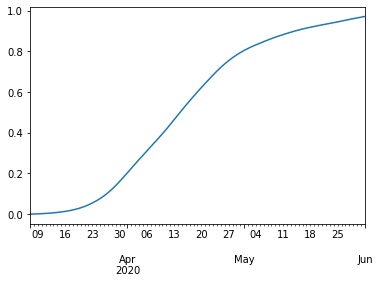

In [40]:
df_pred['scaled'].plot()

We apply the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

Slope 0.063099 with intercept at -6.260


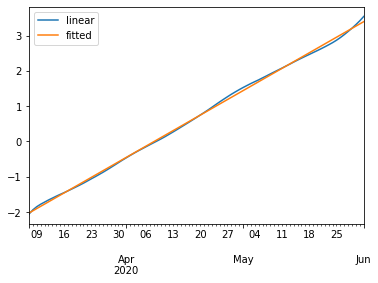

In [41]:
print('Slope {:1.6f} with intercept at {:1.3f}'.format(slope, intercept))
df_pred['linear'] = gumbelinv(df_pred[df_pred['scaled'] < 1]['scaled'])
df_pred['fitted'] = slope * df_pred['daynum'] + intercept
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we calculate beta and mu of the Gumbel distribution by converting `y = ax + b` to `y = (x - mu) / beta`, where `beta = 1 / a` and `mu = -b / a`.

In [42]:
beta = 1 / slope
mu = - intercept / slope
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Gumbel beta 15.848 with mu at 99


Finished fitting, now back to the original data! We apply the Gumbel function to `daynum` and scale the result back to the number of cases according to the estimated progress. The result is the CDF, so we reduce that to the PDF by taking the gradient. To visually check the fit, we plot the cumulative curves.

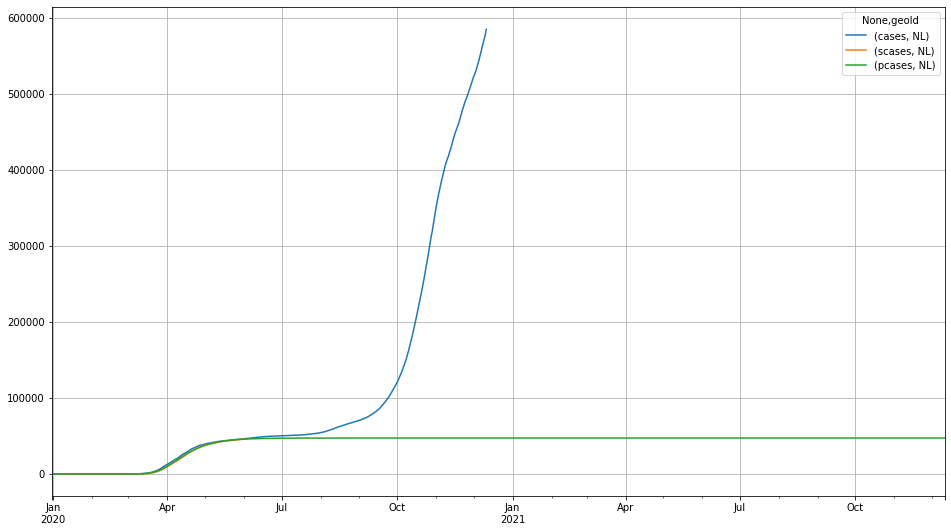

In [43]:
df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
    figsize=(16, 9), grid=True)

We have the daily new case data in our dataframe, ready to compare with the actual and smoothed figures.

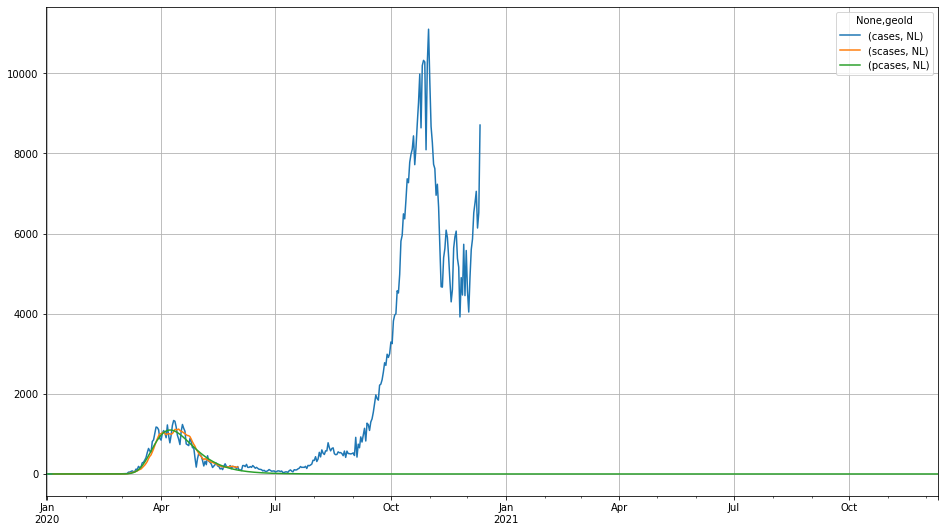

In [44]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
    figsize=(16, 9), grid=True)

The sum of our data would be the estimated total number, which should match the current number of cases and estimated progress in the first wave.

In [45]:
final = df_geo[pmeasure][country].sum()
print('Final of {:1.0f} from an optimization estimate of {:1.0f}'.format(final, numcases / progress))

Final of 47260 from an optimization estimate of 47260


The peak can be found at the first predicted value that is larger than the next.

In [59]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-08


This date should match the `mu` of our distribution, in days since the start of the index.

In [47]:
print('Peak by mu at {}'.format(df_geo.loc[df_geo['daynum'] == mu.astype(int)].index[0].date()))

Peak by mu at 2020-04-08


The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [57]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
    (df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-06-29


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [49]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
    (df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-09


We define the maximum delta as the day in the curve with the sharpest rise.

In [50]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 58 on 2020-03-24


This should match the maximum gradient of the daily data.

In [51]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 58


Back to the original curve, showing the number of infected concurrently.

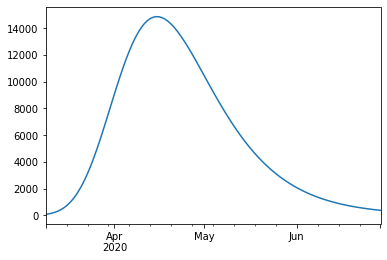

In [56]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [53]:
print('Maximum reported is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum reported is 14868


We can estimate the infection rate for this wave by dividing the infected cases of last week by the infected cases of the two weeks before last week.

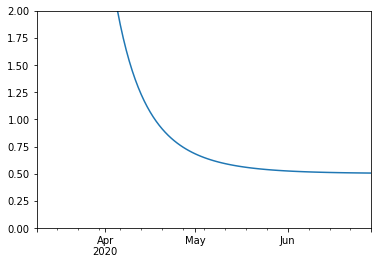

In [54]:
(df_geo.rolling(7).mean() / df_geo.shift(7).rolling(14).mean())[pmeasure][country].loc[start:floor].plot(ylim=(0, 2))

If we look at the difference between our actual (smoothed) value and our prediction, we can try to determine if the curve is breaking out. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

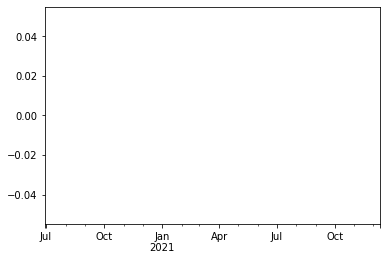

In [55]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[floor:].plot()

Keep exploring! Stay home, wash your hands, keep your distance.